In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import pandas as pd
df_1=pd.read_csv(r'cust_transaction_details (1).csv')
df_2=pd.read_csv(r'Customer_DF (1).csv')

In [2]:
#df = df_1.merge(df_2, on='customerEmail')
df = pd.merge(df_1,df_2, on='customerEmail',how='outer',indicator=True)
df.head()

,Unnamed: 0_x,customerEmail,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,...,Unnamed: 0_y,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud,_merge
0,0.0,josephhoward@yahoo.com,a9lcj51r,vjbdvd,wt07xm68b,1.0,card,JCB 16 digit,18.0,0.0,...,0,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False,both
1,1.0,josephhoward@yahoo.com,y4wcv03i,yp6x27,wt07xm68b,1.0,card,JCB 16 digit,26.0,0.0,...,0,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False,both
2,2.0,evansjeffery@yahoo.com,5mi94sfw,nlghpa,41ug157xz,0.0,bitcoin,American Express,45.0,0.0,...,1,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,both
3,3.0,evansjeffery@yahoo.com,br8ba1nu,uw0eeb,41ug157xz,0.0,bitcoin,American Express,23.0,0.0,...,1,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,both
4,4.0,evansjeffery@yahoo.com,a33145ss,bn44oh,y3xp697jx,1.0,bitcoin,VISA 16 digit,43.0,1.0,...,1,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,both


In [3]:
df.isnull().sum().max()

25

In [4]:
df.isnull()


,Unnamed: 0_x,customerEmail,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,...,Unnamed: 0_y,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud,_merge
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,True,False,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
840,True,False,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
841,True,False,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
842,True,False,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False


In [5]:
df['transactionId'] = df['transactionId'].fillna(0.0)
df['orderId'] = df['orderId'].fillna(0.0)
df['paymentMethodId'] = df['paymentMethodId'].fillna(0.0)
df['paymentMethodRegistrationFailure'] = df['paymentMethodRegistrationFailure'].fillna(0.0)
df['transactionFailed'] = df['transactionFailed'].fillna(0.0)
df['paymentMethodType'] = df['paymentMethodType'].fillna(0.0)
df['orderState'] = df['orderState'].fillna(0.0)
df['paymentMethodProvider'] = df['paymentMethodProvider'].fillna(0.0)
df['transactionAmount'] = df['transactionAmount'].fillna(0.0)


#df[:,2:11]=df[:,2:11].fillna(0.0)

In [6]:
df.isnull().sum()

Unnamed: 0_x                        25
customerEmail                        0
transactionId                        0
orderId                              0
paymentMethodId                      0
paymentMethodRegistrationFailure     0
paymentMethodType                    0
paymentMethodProvider                0
transactionAmount                    0
transactionFailed                    0
orderState                           0
Unnamed: 0_y                         0
customerPhone                        0
customerDevice                       0
customerIPAddress                    0
customerBillingAddress               0
No_Transactions                      0
No_Orders                            0
No_Payments                          0
Fraud                                0
_merge                               0
dtype: int64

In [7]:
df.drop('_merge',axis=1,inplace=True)


In [8]:
df.drop('Unnamed: 0_x',axis=1,inplace=True)
df.drop('Unnamed: 0_y',axis=1,inplace=True)

In [9]:
df.head()

,customerEmail,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud
0,josephhoward@yahoo.com,a9lcj51r,vjbdvd,wt07xm68b,1.0,card,JCB 16 digit,18.0,0.0,pending,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False
1,josephhoward@yahoo.com,y4wcv03i,yp6x27,wt07xm68b,1.0,card,JCB 16 digit,26.0,0.0,fulfilled,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False
2,evansjeffery@yahoo.com,5mi94sfw,nlghpa,41ug157xz,0.0,bitcoin,American Express,45.0,0.0,fulfilled,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True
3,evansjeffery@yahoo.com,br8ba1nu,uw0eeb,41ug157xz,0.0,bitcoin,American Express,23.0,0.0,fulfilled,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True
4,evansjeffery@yahoo.com,a33145ss,bn44oh,y3xp697jx,1.0,bitcoin,VISA 16 digit,43.0,1.0,fulfilled,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True


In [242]:
df.to_csv('final_m2.csv')

In [10]:
df.isnull().sum().max()

0

In [11]:
df.columns

Index(['customerEmail', 'transactionId', 'orderId', 'paymentMethodId',
       'paymentMethodRegistrationFailure', 'paymentMethodType',
       'paymentMethodProvider', 'transactionAmount', 'transactionFailed',
       'orderState', 'customerPhone', 'customerDevice', 'customerIPAddress',
       'customerBillingAddress', 'No_Transactions', 'No_Orders', 'No_Payments',
       'Fraud'],
      dtype='object')

In [12]:
print('No Frauds', round(df['Fraud'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Fraud'].value_counts()[1]/len(df) * 100,2), '% of the dataset')
#To find the number of Fraudulents and Non Fraudulents

No Frauds 45.73 % of the dataset
Frauds 54.27 % of the dataset


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

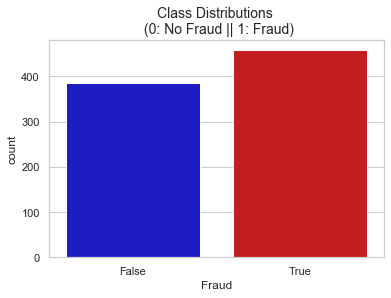

In [13]:
import seaborn as sns
colors = ["#0101DF", "#DF0101"]

sns.countplot('Fraud', data=df, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

In [14]:
target=df['Fraud']
df_c=df.copy()
df_c.drop('Fraud',axis=1,inplace=True)
#print(target)
#features=df['customerEmail','paymentMethodRegistrationFailure']

In [15]:
#removing the insignificant columns 
df_c.drop('transactionId',axis=1,inplace=True)
df_c.drop('orderId',axis=1,inplace=True)
df_c.drop('paymentMethodId',axis=1,inplace=True)
df_c.drop('customerPhone',axis=1,inplace=True)
df_c.drop('customerDevice',axis=1,inplace=True)
df_c.drop('customerIPAddress',axis=1,inplace=True)



In [16]:
features = pd.get_dummies(df_c)
features = features.fillna(0.0)

In [17]:
features.head

<bound method NDFrame.head of      paymentMethodRegistrationFailure  transactionAmount  transactionFailed  \
0                                 1.0               18.0                0.0   
1                                 1.0               26.0                0.0   
2                                 0.0               45.0                0.0   
3                                 0.0               23.0                0.0   
4                                 1.0               43.0                1.0   
..                                ...                ...                ...   
839                               0.0                0.0                0.0   
840                               0.0                0.0                0.0   
841                               0.0                0.0                0.0   
842                               0.0                0.0                0.0   
843                               0.0                0.0                0.0   

     No_Transactions 

In [27]:
df_c.columns

Index(['customerEmail', 'paymentMethodRegistrationFailure',
       'paymentMethodType', 'paymentMethodProvider', 'transactionAmount',
       'transactionFailed', 'orderState', 'customerBillingAddress',
       'No_Transactions', 'No_Orders', 'No_Payments'],
      dtype='object')

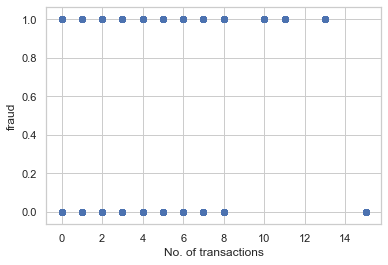

In [19]:

plt.scatter(df['No_Transactions'], df['Fraud'])
plt.xlabel("No. of transactions")
plt.ylabel("fraud")
plt.show()

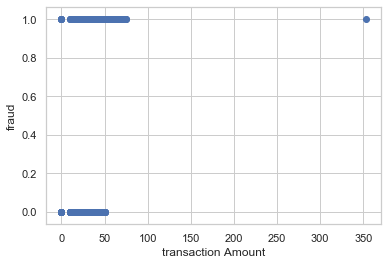

In [20]:
plt.scatter(df['transactionAmount'], df['Fraud'])
plt.xlabel("transaction Amount")
plt.ylabel("fraud")
plt.show()

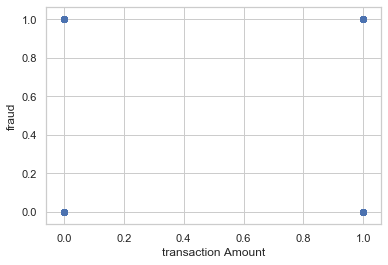

In [21]:
plt.scatter(df['transactionFailed'], df['Fraud'])
plt.xlabel("transaction Amount")
plt.ylabel("fraud")
plt.show()

Text(0, 0.5, 'Fraud')

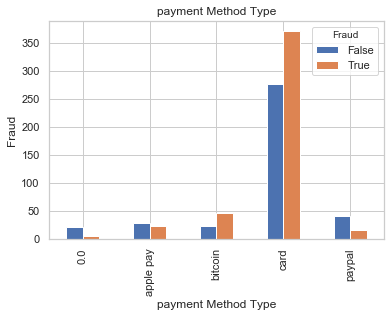

In [25]:
pd.crosstab(df.paymentMethodType,df.Fraud).plot(kind='bar')
plt.title('payment Method Type')
plt.xlabel('payment Method Type')
plt.ylabel('Fraud')
#plt.savefig('pur_fre_month_bar')

Text(0, 0.5, 'Fraud')

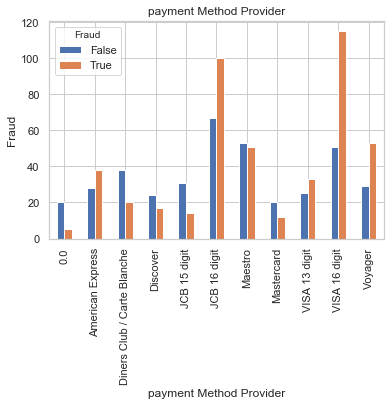

In [29]:
pd.crosstab(df.paymentMethodProvider,df.Fraud).plot(kind='bar')
plt.title('payment Method Provider')
plt.xlabel('payment Method Provider')
plt.ylabel('Fraud')

Text(0, 0.5, 'Fraud')

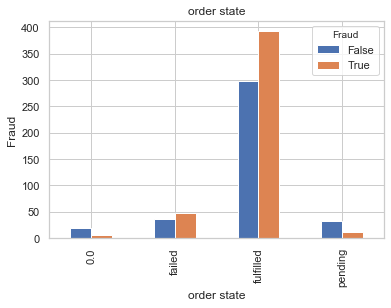

In [32]:
pd.crosstab(df.orderState,df.Fraud).plot(kind='bar')
plt.title('order state')
plt.xlabel('order state')
plt.ylabel('Fraud')

Text(0, 0.5, 'Fraud')

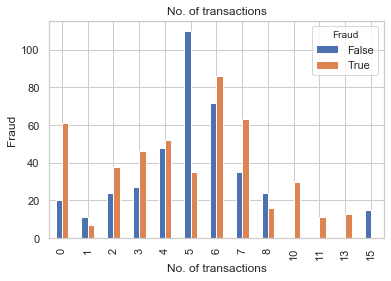

In [34]:
pd.crosstab(df.No_Transactions,df.Fraud).plot(kind='bar')
plt.title('No. of transactions')
plt.xlabel('No. of transactions')
plt.ylabel('Fraud')

Text(0, 0.5, 'Fraud')

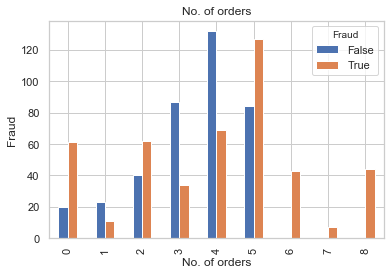

In [36]:
pd.crosstab(df.No_Orders,df.Fraud).plot(kind='bar')
plt.title('No. of orders')
plt.xlabel('No. of orders')
plt.ylabel('Fraud')

Text(0, 0.5, 'Fraud')

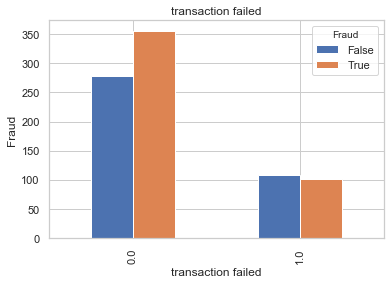

In [38]:
pd.crosstab(df.transactionFailed,df.Fraud).plot(kind='bar')
plt.title('transaction failed')
plt.xlabel('transaction failed')
plt.ylabel('Fraud')

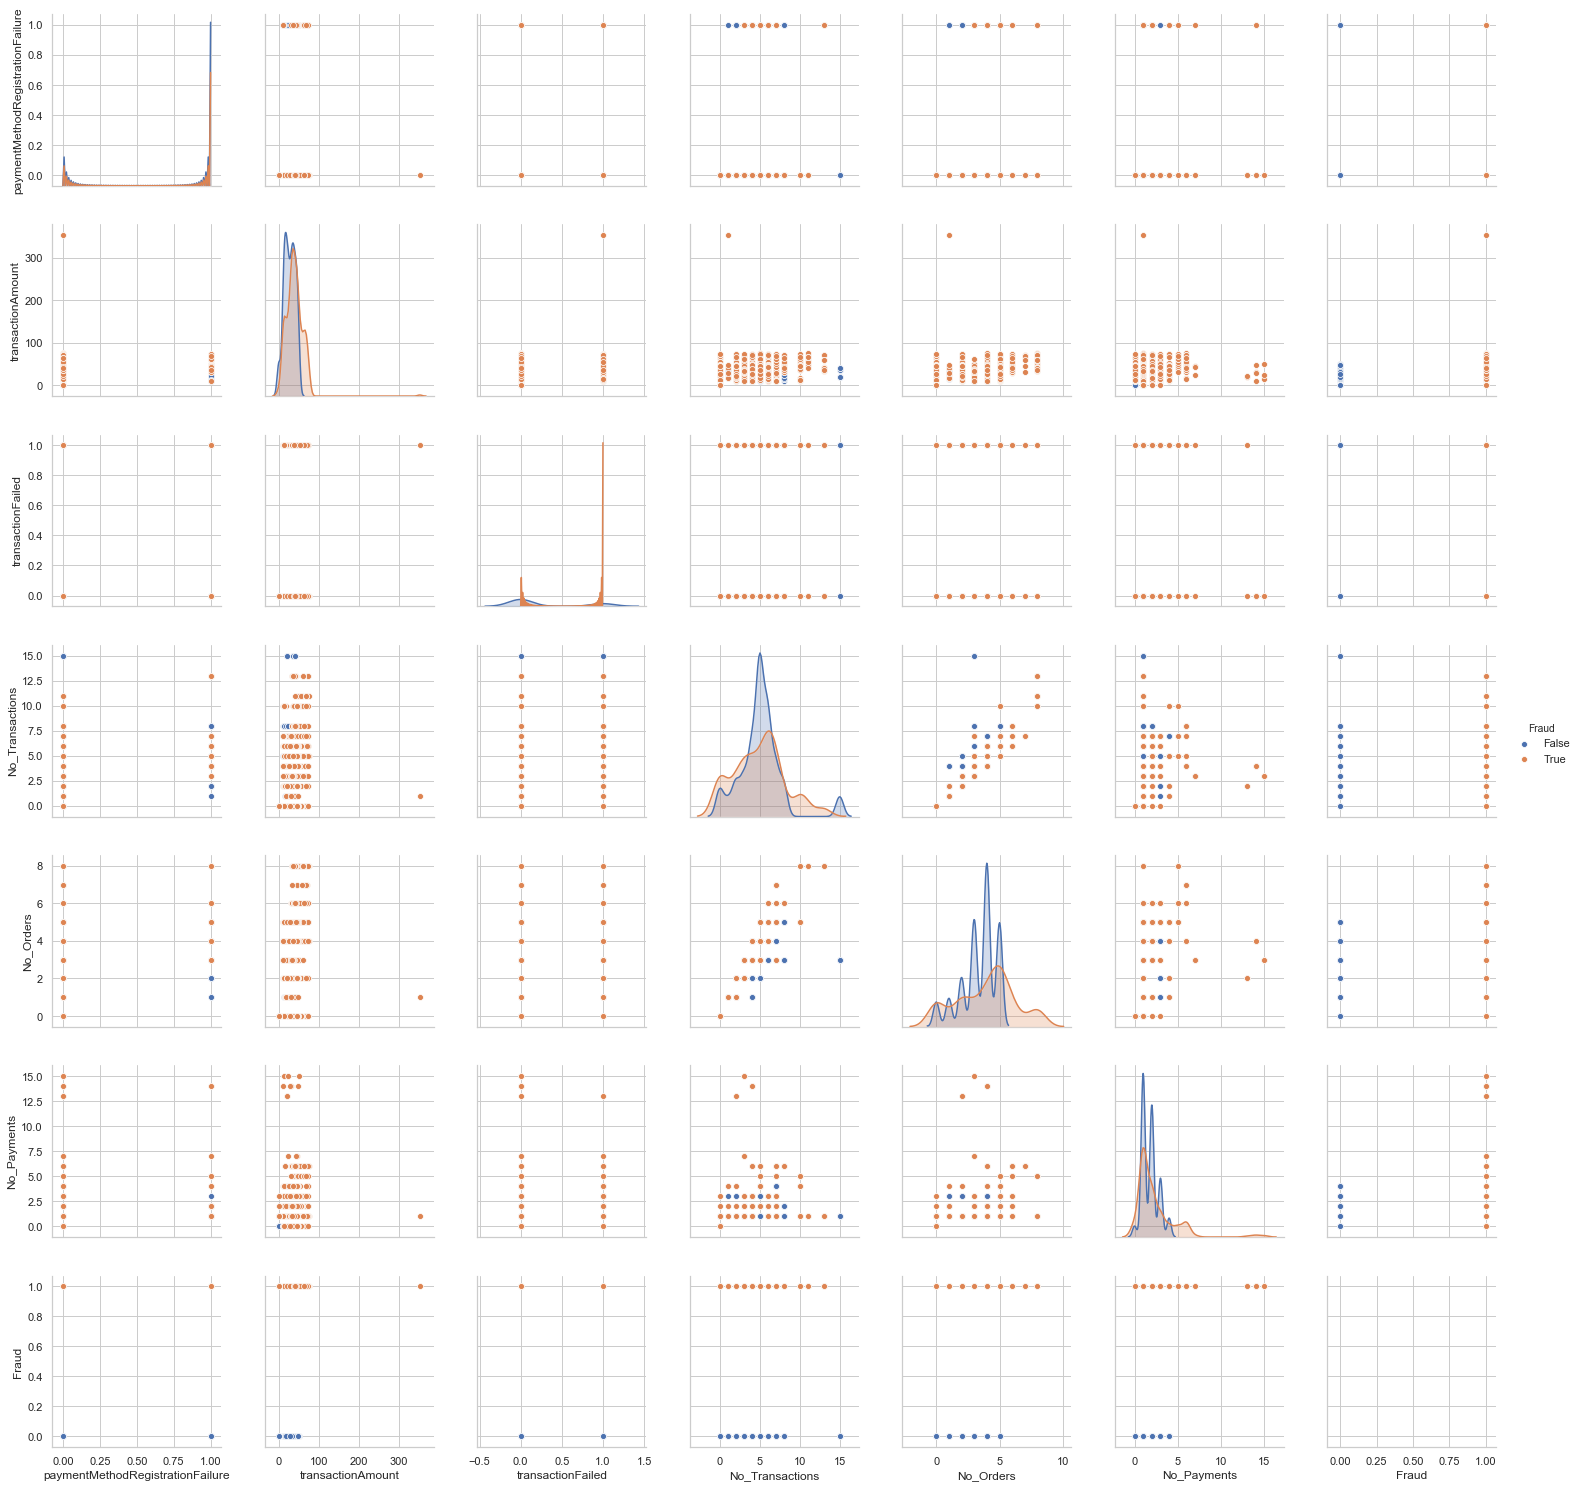

In [39]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(df,hue='Fraud',size=3);
plt.show();

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

In [42]:
# Import the Decision Tree classifier from sklearn
#using decision tree classifier
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [43]:
# Making predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculating the accuracy
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print('The training accuracy is', train_accuracy)
print('The test accuracy is', test_accuracy)

The training accuracy is 1.0
The test accuracy is 0.9724409448818898


In [44]:
#for better accuracy on test data
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import GridSearchCV

clf = DecisionTreeClassifier(random_state = 23)
parameters = {'max_depth': np.arange(3, 21), 'min_samples_leaf': np.arange(2, 11), 'min_samples_split': np.arange(4, 11)}
scorer = make_scorer(accuracy_score)
grid = GridSearchCV(estimator = clf, param_grid = parameters, scoring = scorer)


#Training the model
grid_fit = grid.fit(X_train, y_train)
best_clf = grid_fit.best_estimator_
print(best_clf)

# TODO: Make predictions
y_train_pred = best_clf.predict(X_train)
y_test_pred = best_clf.predict(X_test)

# TODO: Calculate the accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print('The training accuracy is', train_accuracy)
print('The test accuracy is', test_accuracy)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=16,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=23, splitter='best')
The training accuracy is 0.9813559322033898
The test accuracy is 0.9330708661417323


In [45]:
#Using logistic Regression
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
pred = model.predict(X_test)


In [47]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(X_test, pred)))

Accuracy of logistic regression classifier on test set: 1.00


In [48]:
#k-fold cross validation
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("Using 10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.963


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to '

In [49]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, pred)
print(confusion_matrix)

[[116   0]
 [  7 131]]


In [50]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

       False       0.94      1.00      0.97       116
        True       1.00      0.95      0.97       138

    accuracy                           0.97       254
   macro avg       0.97      0.97      0.97       254
weighted avg       0.97      0.97      0.97       254



In [51]:
#recall and F1 score
from sklearn.metrics import f1_score, recall_score
f1_score = round(f1_score(y_test, pred), 2)
recall_score = round(recall_score(y_test, pred), 2)
print("Sensitivity/Recall for Logistic Regression Model 1 : {recall_score}".format(recall_score = recall_score))
print("F1 Score for Logistic Regression Model 1 : {f1_score}".format(f1_score = f1_score))


Sensitivity/Recall for Logistic Regression Model 1 : 0.95
F1 Score for Logistic Regression Model 1 : 0.97
